In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from loaders import load_features

In [2]:
features = load_features()
features

,video_id,category_id,publish_weekday,publish_hour,like_ratio,likes_per_view,dislikes_per_view,comments_per_view,title_num_chars,title_num_words,...,faces_angry,faces_disgust,faces_fear,faces_happy,faces_neutral,faces_sad,faces_surprise,text_area,text_centroid_x,text_centroid_y
0,Jw1Y-zhQURU,NaN,4,7,0.844573,0.007707,0.001418,0.001312,45,7,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
1,3s1rvMFUweQ,NaN,6,6,0.917645,0.024260,0.002177,0.002617,43,15,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
2,n1WpP7iowLc,NaN,4,17,0.947740,0.045891,0.002531,0.007336,43,13,...,0,0,0,0,0,0,0,0.419853,25.809107,55.878284
3,PUTEiSjKwJU,NaN,0,2,0.941463,0.006934,0.000431,0.001329,76,15,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
4,rHwDegptbI4,NaN,0,1,0.937500,0.003057,0.000204,0.003057,55,9,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73364,1PhPYr_9zRY,NaN,4,16,0.993766,0.078203,0.000491,0.007581,52,8,...,0,0,0,0,0,0,1,0.000000,NaN,NaN
73365,1h7KV2sjUWY,NaN,4,1,0.993674,0.056356,0.000359,0.003696,26,5,...,0,0,0,0,0,0,0,0.047794,60.500000,32.000000
73366,D6Oy4LfoqsU,NaN,4,17,0.978982,0.045073,0.000968,0.003743,84,17,...,0,0,2,0,0,0,0,0.000000,NaN,NaN
73367,oV0zkMe1K8s,NaN,3,17,0.985465,0.034086,0.000503,0.002312,35,6,...,0,0,0,0,0,0,0,0.000000,NaN,NaN


<BarContainer object of 20 artists>

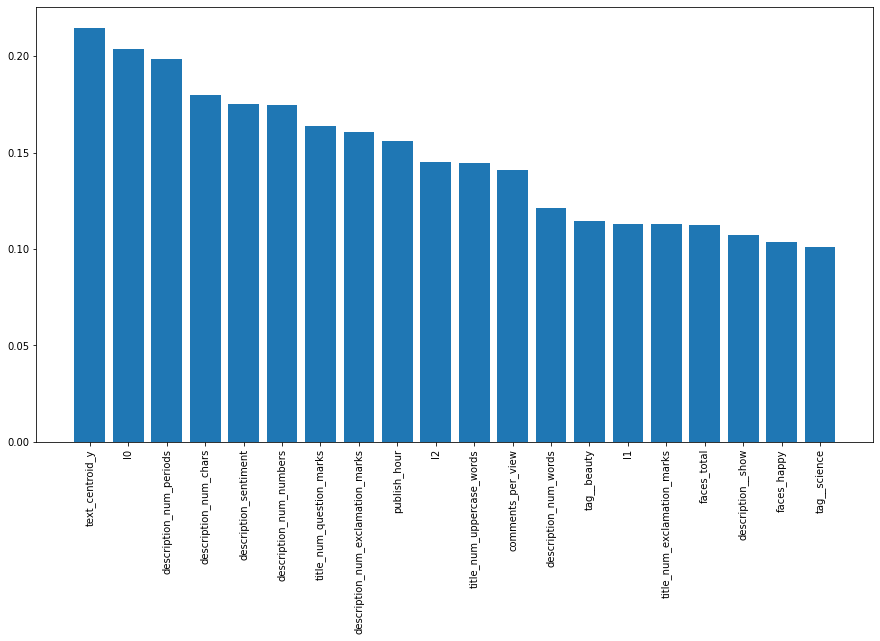

In [4]:
import math

features_ = features.drop(columns=['video_id', '_faces']).dropna()
correlations = []
for col_name in features_.columns:
    col = features_[col_name]
    if any(col_name.startswith(prefix) for prefix in ['title__', 'description__', 'tag__']):
        col = col.astype(np.float32)
    corr = features_['category_id'].corr(col)
    if not math.isnan(corr):
        correlations.append((col_name, corr))

correlated_features = sorted([row for row in correlations if 1 > row[1] > 0.1], key=lambda row: -abs(row[1]))

names = [row[0] for row in correlated_features]
values = [row[1] for row in correlated_features]
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.bar(names, values)